# This Notebook is Created by Ifan Hakim
======================================================

# Collecting Library

In [ ]:
pip install PySastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 13.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import datasets
from sklearn.pipeline import Pipeline
import nltk
import string
import re
import joblib
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

In [ ]:
!pip install transformers torch
!pip install transformers torch pandas emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import re
import emoji
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Import the Dataset

In [ ]:
#Koneksi ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the dataset
# df = pd.read_csv('/content/drive/MyDrive/Dataset/boat-aura-farm.csv')
# df['full_text']

# Preprocessing Data

In [ ]:
# def clean_text(text):
#     text = text.lower()  # lowercase
#     text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # hapus URL
#     text = re.sub(r'@\w+', '', text)  # hapus mention
#     text = re.sub(r'#\w+', '', text)  # hapus hashtag
#     text = emoji.replace_emoji(text, replace='')  # hapus emoji
#     text = re.sub(r'[^\w\s]', '', text)  # hapus tanda baca
#     text = re.sub(r'\d+', '', text)  # hapus angka
#     text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih
#     return text

In [ ]:
# Pastikan kolom full_text ada
# if 'full_text' not in df.columns:
#     raise ValueError("Kolom 'full_text' tidak ditemukan di CSV!")

In [ ]:
# Bersihkan teks
# df['clean_text'] = df['full_text'].astype(str).apply(clean_text)

# Sentiment Classification

In [ ]:
# Load model dan tokenizer
model_name = "w11wo/indonesian-roberta-base-sentiment-classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# Buat pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Device set to use cuda:0


In [ ]:
# Fungsi klasifikasi
def classify_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label'], result['score']

In [ ]:
# Terapkan ke dataframe
# df[['sentiment', 'confidence']] = df['clean_text'].apply(lambda x: pd.Series(classify_sentiment(x)))

In [ ]:
# Simpan hasil
# df.to_csv('/content/drive/MyDrive/Dataset/aura-pacu-jalur-sentiment.csv', index=False)

In [ ]:
# Tampilkan hasil contoh
# print(df[['full_text', 'clean_text', 'sentiment', 'confidence']].head())

In [ ]:
# plt.hist(df.sentiment)

In [ ]:
# np.mean(df.confidence)

# Analytic

In [ ]:
df_sentiment = pd.read_csv('/content/drive/MyDrive/Dataset/aura-pacu-jalur-sentiment.csv')
df_sentiment[['clean_text', 'sentiment', 'confidence']]

,clean_text,sentiment,confidence
0,wow king of aura farming pacu jalur,positive,0.997551
1,gubernur riau abdul wahid mengangkat rayyan ar...,neutral,0.873771
2,its veda pratama masterclass in sachsenring in...,neutral,0.897314
3,trend pacu jalur udah sampe thailand,neutral,0.974017
4,lihat video kyk gini sliweran di akunakun luar...,positive,0.955914
...,...,...,...
165,aura farming joget santuy bocah melayu pacu ja...,neutral,0.927985
166,kasus parkir lagi astaghfirullah parkir d depa...,positive,0.643356
167,di tengah hiruk pikuk perlombaan pacu jalur ta...,neutral,0.990778
168,sengaja lebihin gap detik buat selebrasi pacu ...,neutral,0.981381


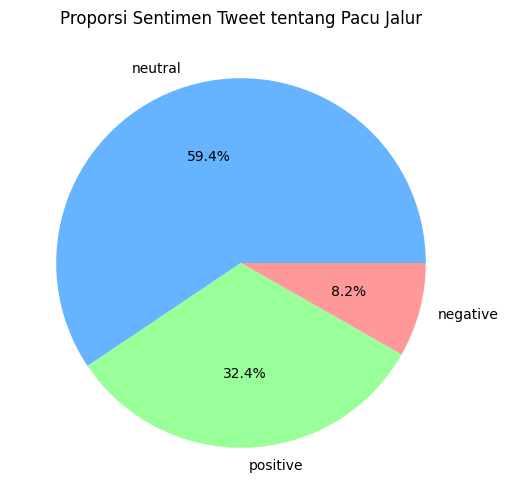

In [ ]:
# Pie Chart
sentiment_counts = df_sentiment['sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Proporsi Sentimen Tweet tentang Pacu Jalur')
plt.show()

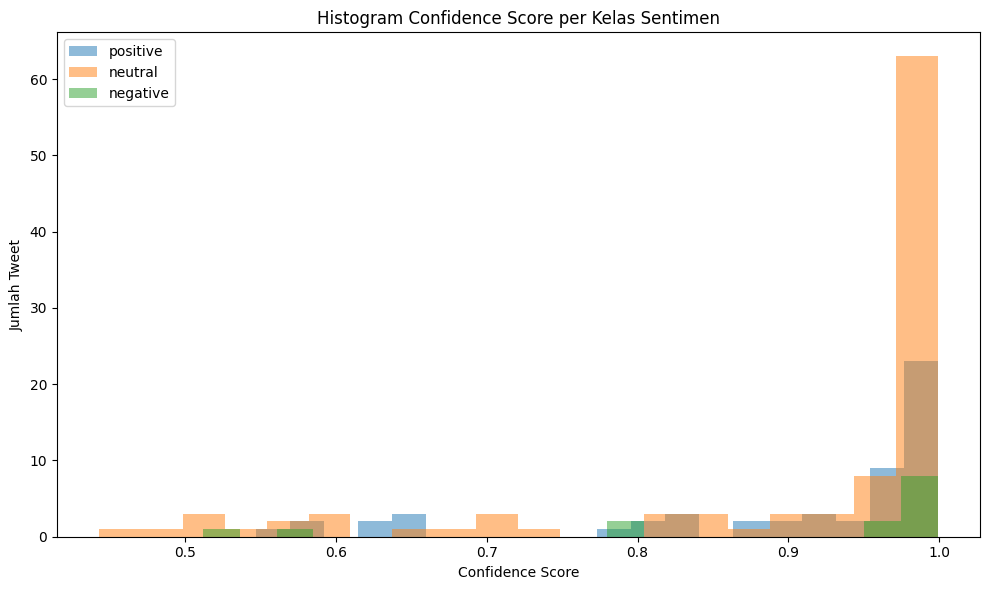

In [ ]:
plt.figure(figsize=(10,6))
sentiments = df_sentiment['sentiment'].unique()
for sentiment in sentiments:
    subset = df_sentiment[df_sentiment['sentiment'] == sentiment]
    plt.hist(subset['confidence'], bins=20, alpha=0.5, label=sentiment)

plt.title("Histogram Confidence Score per Kelas Sentimen")
plt.xlabel("Confidence Score")
plt.ylabel("Jumlah Tweet")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Menampilkan kuantitas per variabel sentimen
print("Kuantitas per variabel sentimen:")
print(df_sentiment['sentiment'].value_counts())

Kuantitas per variabel sentimen:
sentiment
neutral     101
positive     55
negative     14
Name: count, dtype: int64


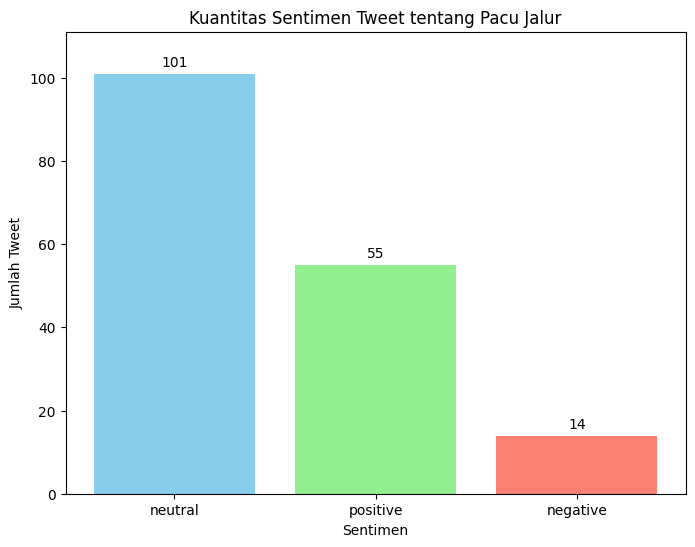

In [ ]:
sentiment_counts = df_sentiment['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Kuantitas Sentimen Tweet tentang Pacu Jalur')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
plt.ylim(0, sentiment_counts.max() * 1.1) # Memberi sedikit ruang di atas bar tertinggi

# Menambahkan nilai kuantitas di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.show()

In [ ]:
# Fungsi untuk membuat wordcloud
def create_wordcloud(text_data, title, colormap='viridis', max_words=100, width=800, height=400):
    """
    Membuat wordcloud dari data teks

    Parameters:
    text_data: string atau list of strings
    title: judul untuk plot
    colormap: color scheme untuk wordcloud
    max_words: maksimal kata yang ditampilkan
    width, height: ukuran wordcloud
    """
    # Gabungkan semua teks menjadi satu string
    if isinstance(text_data, list):
        combined_text = ' '.join(text_data)
    else:
        combined_text = str(text_data)

    # Buat wordcloud
    wordcloud = WordCloud(
        width=width,
        height=height,
        background_color='white',
        colormap=colormap,
        max_words=max_words,
        relative_scaling=0.5,
        random_state=42
    ).generate(combined_text)

    # Plot wordcloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tight_layout(pad=0)
    plt.show()

=== WORDCLOUD UNTUK SEMUA TWEET ===


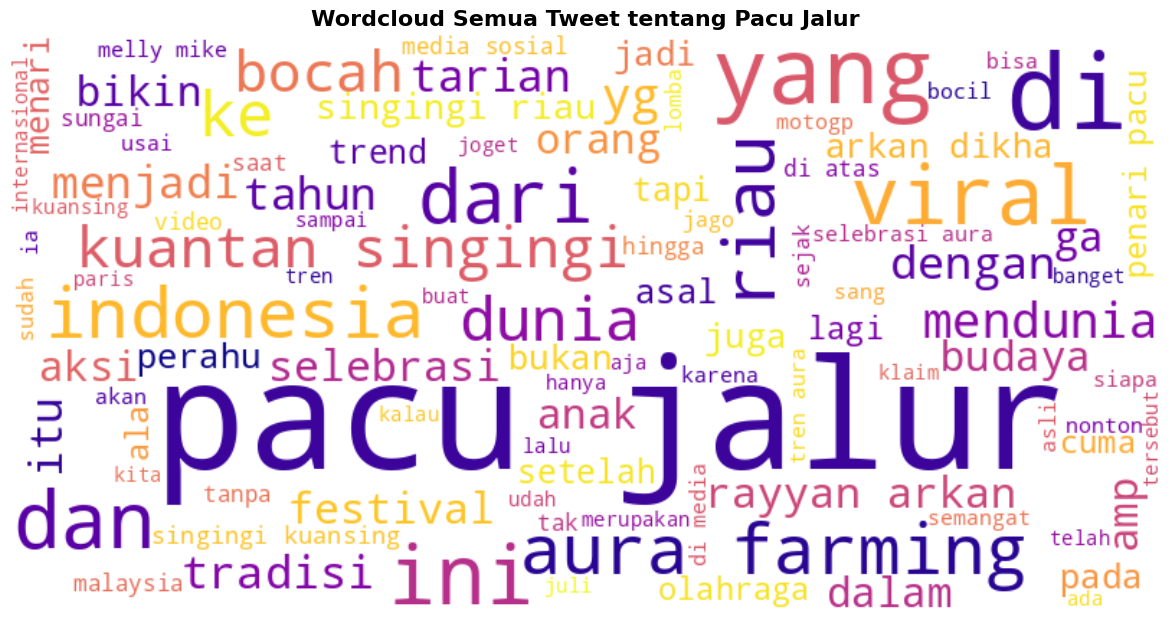

In [ ]:
# 1. Wordcloud untuk semua tweet
print("=== WORDCLOUD UNTUK SEMUA TWEET ===")
all_text = df_sentiment['clean_text'].dropna().tolist()
create_wordcloud(all_text, 'Wordcloud Semua Tweet tentang Pacu Jalur', 'plasma')


=== WORDCLOUD BERDASARKAN SENTIMEN ===


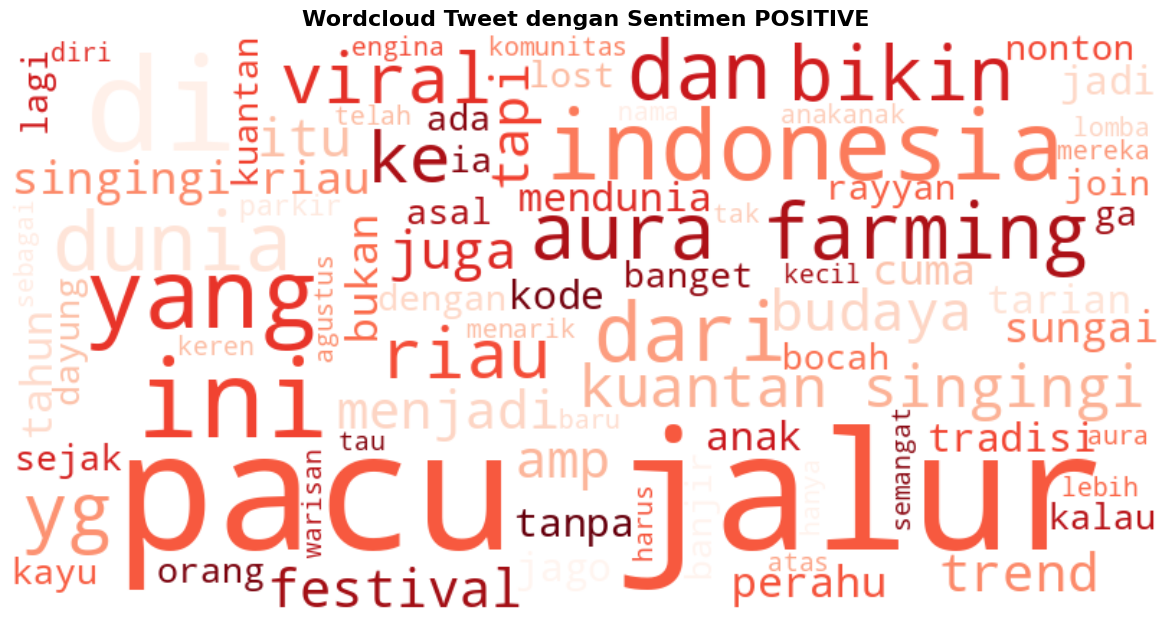

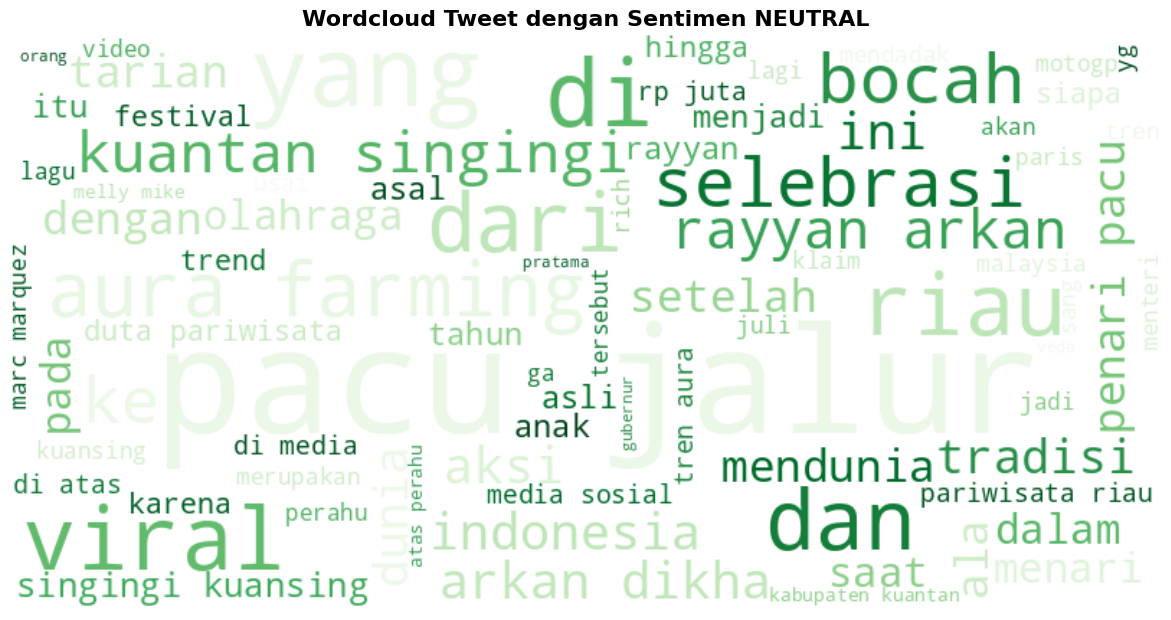

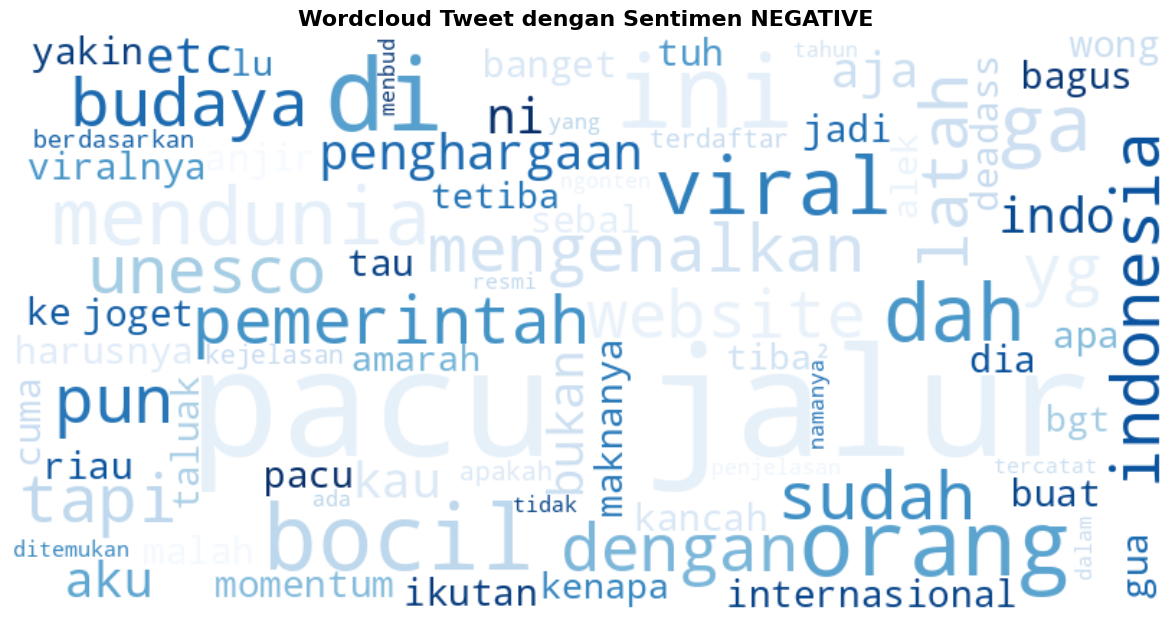


=== WORDCLOUD TWEET DENGAN CONFIDENCE TINGGI ===


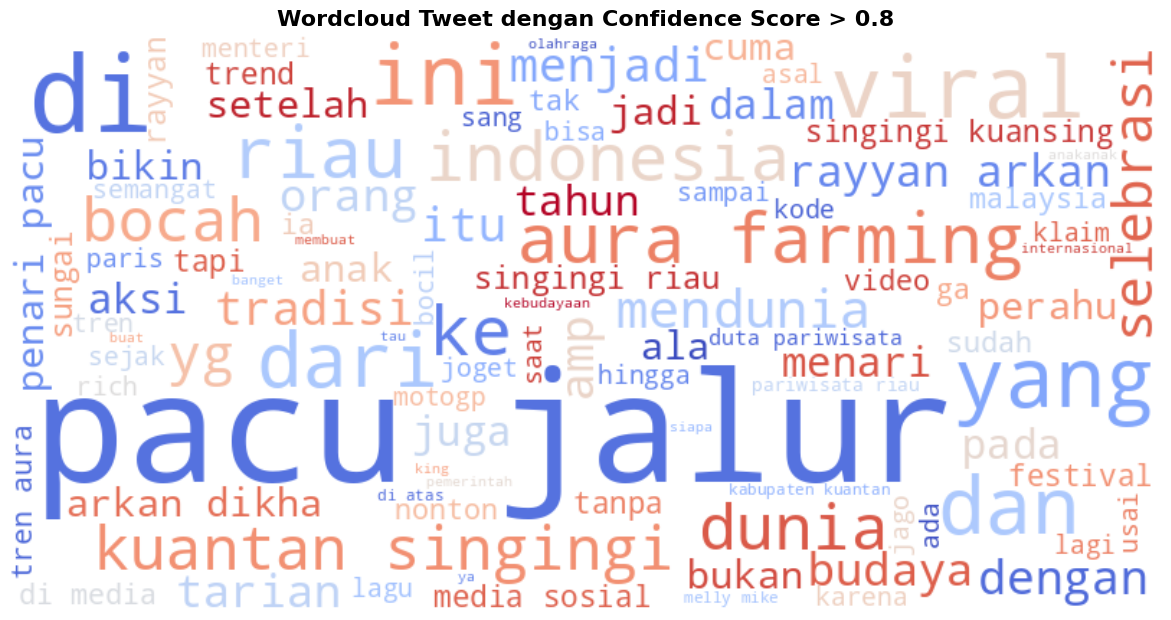

In [ ]:
# 2. Wordcloud berdasarkan sentimen
sentiments = df_sentiment['sentiment'].unique()
colors = ['Reds', 'Greens', 'Blues']

print("\n=== WORDCLOUD BERDASARKAN SENTIMEN ===")
for i, sentiment in enumerate(sentiments):
    sentiment_text = df_sentiment[df_sentiment['sentiment'] == sentiment]['clean_text'].dropna().tolist()
    if sentiment_text:  # Pastikan ada data
        color = colors[i % len(colors)]
        create_wordcloud(
            sentiment_text,
            f'Wordcloud Tweet dengan Sentimen {sentiment.upper()}',
            color,
            max_words=80
        )

# 3. Wordcloud dengan filter confidence tinggi (>0.8)
print("\n=== WORDCLOUD TWEET DENGAN CONFIDENCE TINGGI ===")
high_confidence = df_sentiment[df_sentiment['confidence'] > 0.8]
if not high_confidence.empty:
    high_conf_text = high_confidence['clean_text'].dropna().tolist()
    create_wordcloud(
        high_conf_text,
        'Wordcloud Tweet dengan Confidence Score > 0.8',
        'coolwarm'
    )


=== 20 Kata Paling Sering Muncul di Semua Tweet ===
pacu: 191
jalur: 191
di: 79
yang: 52
riau: 47
ini: 41
viral: 39
aura: 38
dan: 37
dari: 36
farming: 32
indonesia: 30
kuantan: 28
ke: 24
rayyan: 22
singingi: 22
dunia: 22
bocah: 21
selebrasi: 18
yg: 16


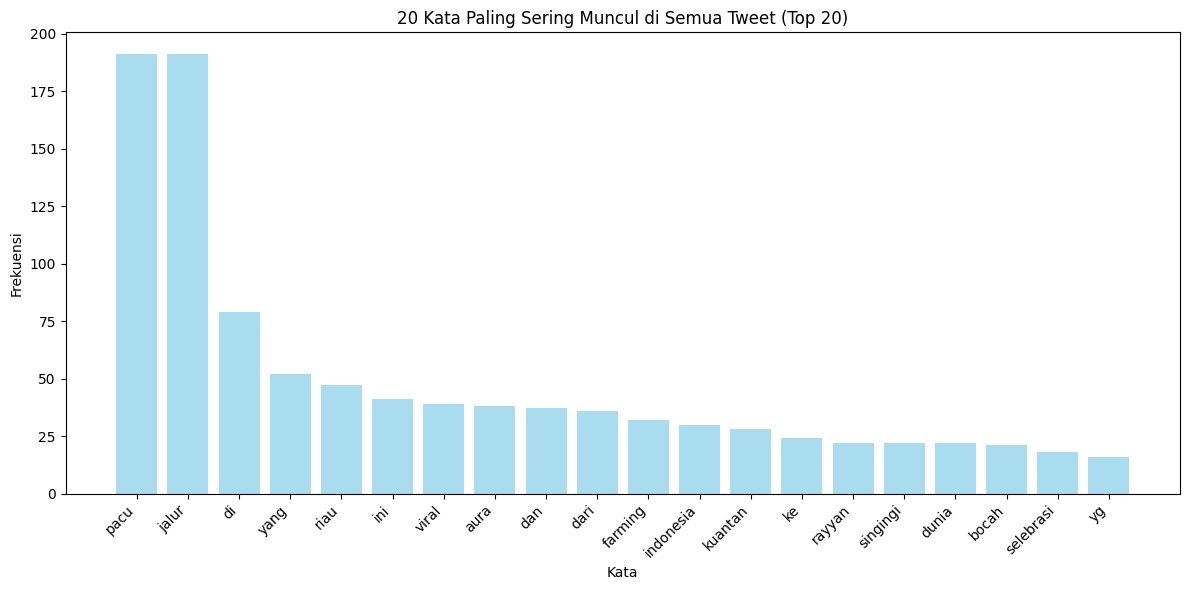


=== 15 Kata Paling Sering di Tweet POSITIVE ===
jalur: 63
pacu: 62
di: 34
ini: 23
yang: 18
indonesia: 18
riau: 16
aura: 14
kuantan: 13
dan: 12
dari: 12
dunia: 12
farming: 11
bikin: 10
yg: 10


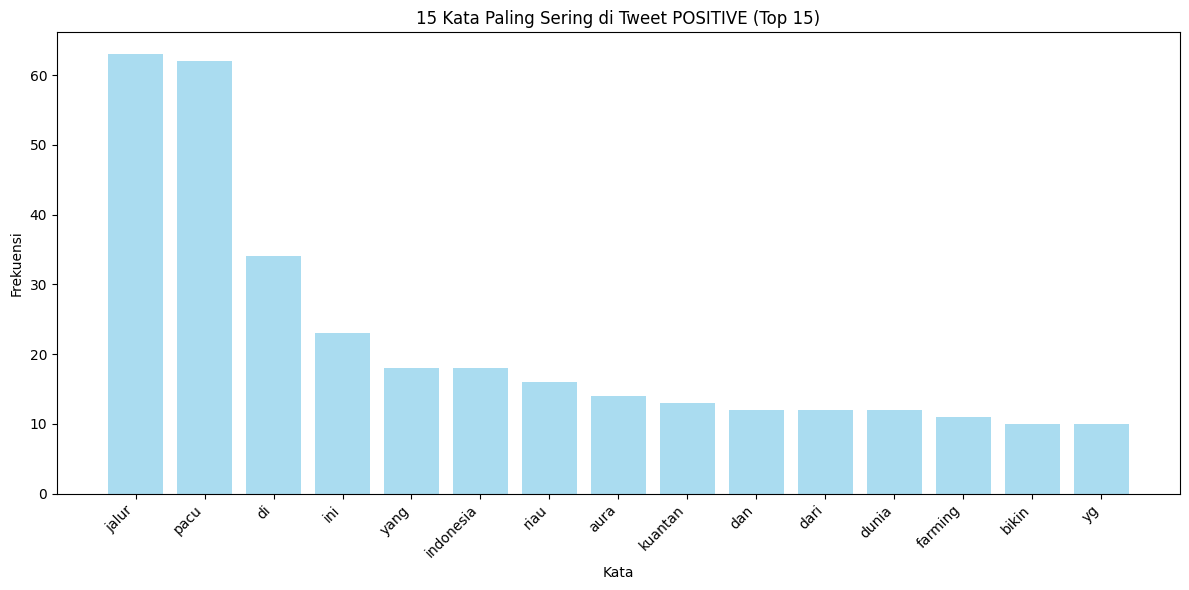


=== 15 Kata Paling Sering di Tweet NEUTRAL ===
pacu: 113
jalur: 113
di: 40
yang: 33
riau: 30
viral: 27
dan: 24
aura: 23
dari: 23
farming: 20
rayyan: 18
selebrasi: 16
bocah: 16
kuantan: 15
ke: 14


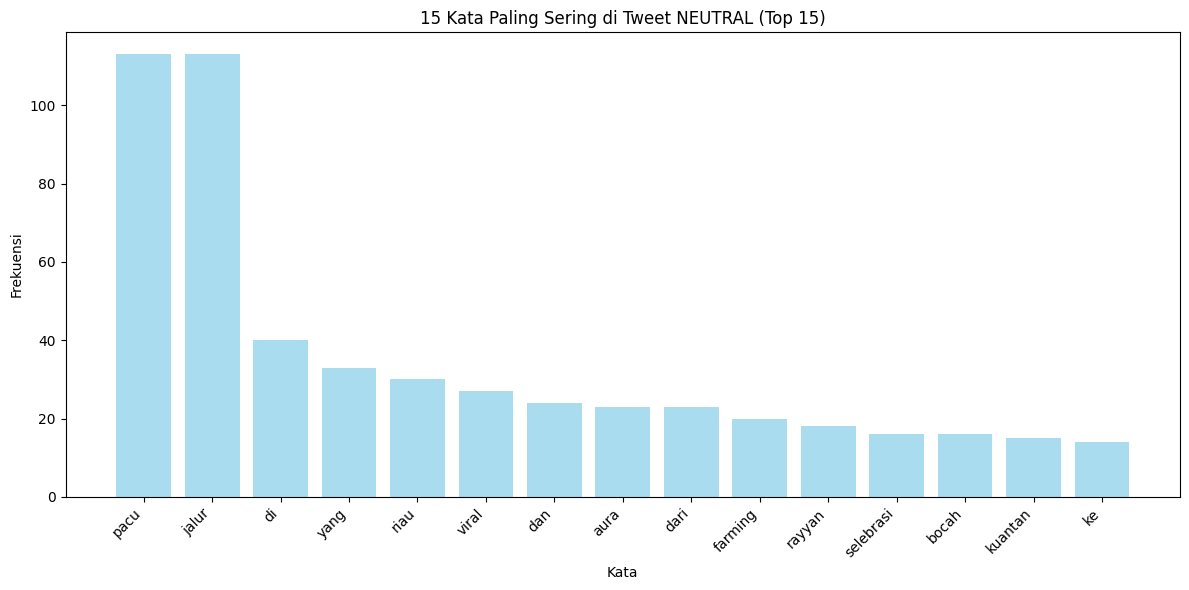


=== 15 Kata Paling Sering di Tweet NEGATIVE ===
pacu: 16
jalur: 15
ini: 5
di: 5
orang: 4
bocil: 4
viral: 3
ga: 3
mendunia: 3
dah: 3
dengan: 2
yg: 2
pemerintah: 2
mengenalkan: 2
budaya: 2


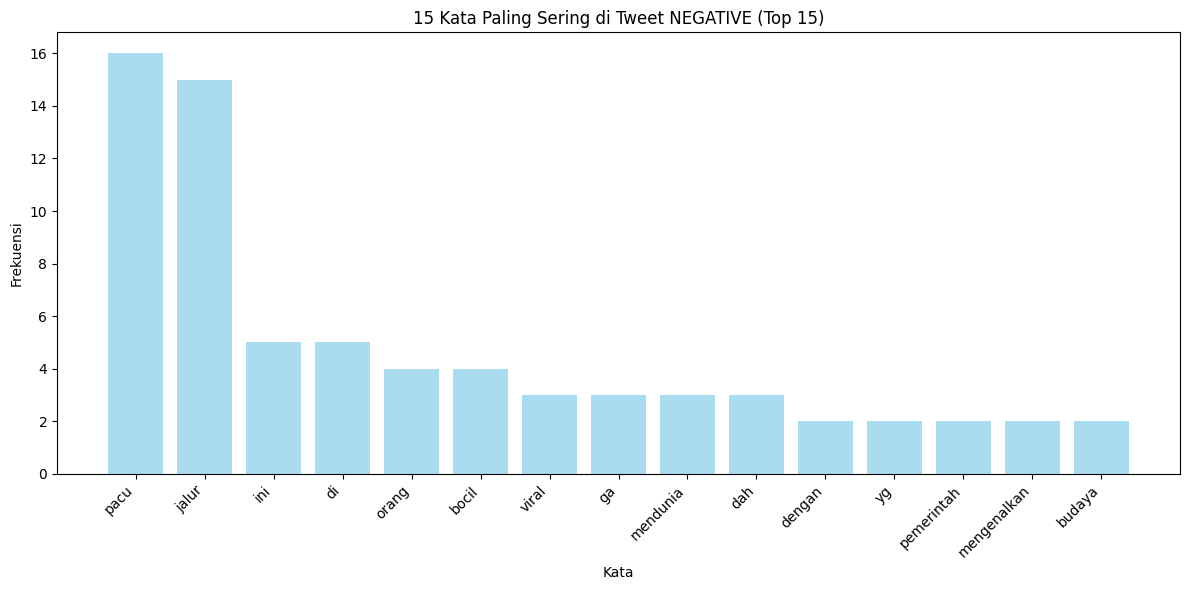

In [ ]:
# 4. Fungsi untuk melihat kata-kata paling sering muncul
def show_top_words(text_list, top_n=20, title="Top Words"):
    """
    Menampilkan kata-kata yang paling sering muncul
    """
    # Gabungkan semua teks
    combined_text = ' '.join(text_list)

    # Split menjadi kata-kata
    words = combined_text.split()

    # Hitung frekuensi
    word_freq = Counter(words)

    # Ambil top_n kata
    top_words = word_freq.most_common(top_n)

    print(f"\n=== {title} ===")
    for word, freq in top_words:
        print(f"{word}: {freq}")

    # Plot bar chart
    words, frequencies = zip(*top_words)
    plt.figure(figsize=(12, 6))
    plt.bar(words, frequencies, color='skyblue', alpha=0.7)
    plt.title(f'{title} (Top {top_n})')
    plt.xlabel('Kata')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return top_words

# Tampilkan top words untuk semua tweet
top_words_all = show_top_words(all_text, 20, "20 Kata Paling Sering Muncul di Semua Tweet")

# Tampilkan top words untuk setiap sentimen
for sentiment in sentiments:
    sentiment_text = df_sentiment[df_sentiment['sentiment'] == sentiment]['clean_text'].dropna().tolist()
    if sentiment_text:
        show_top_words(
            sentiment_text,
            15,
            f"15 Kata Paling Sering di Tweet {sentiment.upper()}"
        )

In [ ]:
# 5. Wordcloud comparison (side by side untuk sentimen positif vs negatif)
def create_comparison_wordcloud():
    """
    Membuat perbandingan wordcloud antara sentimen positif dan negatif
    """
    if 'POSITIVE' in sentiments and 'NEGATIVE' in sentiments:
        positive_text = ' '.join(df_sentiment[df_sentiment['sentiment'] == 'POSITIVE']['clean_text'].dropna())
        negative_text = ' '.join(df_sentiment[df_sentiment['sentiment'] == 'NEGATIVE']['clean_text'].dropna())

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

        # Wordcloud positif
        wc_pos = WordCloud(width=400, height=400, background_color='white',
                          colormap='Greens', max_words=80, random_state=42).generate(positive_text)
        ax1.imshow(wc_pos, interpolation='bilinear')
        ax1.set_title('Sentimen POSITIF', fontsize=14, fontweight='bold')
        ax1.axis('off')

        # Wordcloud negatif
        wc_neg = WordCloud(width=400, height=400, background_color='white',
                          colormap='Reds', max_words=80, random_state=42).generate(negative_text)
        ax2.imshow(wc_neg, interpolation='bilinear')
        ax2.set_title('Sentimen NEGATIF', fontsize=14, fontweight='bold')
        ax2.axis('off')

        plt.tight_layout()
        plt.show()

print("\n=== PERBANDINGAN WORDCLOUD POSITIF VS NEGATIF ===")
create_comparison_wordcloud()

# 6. Statistik tambahan
print("\n=== STATISTIK DATASET ===")
print(f"Total tweet: {len(df_sentiment)}")
print(f"Distribusi sentimen:")
print(df_sentiment['sentiment'].value_counts())
print(f"\nRata-rata confidence score: {df_sentiment['confidence'].mean():.4f}")
print(f"Tweet dengan confidence > 0.8: {len(df_sentiment[df_sentiment['confidence'] > 0.8])}")


=== PERBANDINGAN WORDCLOUD POSITIF VS NEGATIF ===

=== STATISTIK DATASET ===
Total tweet: 170
Distribusi sentimen:
sentiment
neutral     101
positive     55
negative     14
Name: count, dtype: int64

Rata-rata confidence score: 0.9052
Tweet dengan confidence > 0.8: 139


In [ ]:
# Menghitung rata-rata confidence
average_confidence = df_sentiment['confidence'].mean()
print(f"Rata-rata confidence score: {average_confidence:.4f}")

Rata-rata confidence score: 0.9052
